In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd

# Spotify API credentials
CLIENT_ID = '380a6b3535dc420a905dccf328a0e165'
CLIENT_SECRET = 'b0ca7947448246d28aafc40f49610cf4'

# Authenticate
auth_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(auth_manager=auth_manager)

# Function to get playlist tracks
def get_playlist_tracks(username, playlist_id):
    try:
        results = sp.user_playlist_tracks(username, playlist_id)
        tracks = results['items']
        while results['next']:
            results = sp.next(results)
            tracks.extend(results['items'])
        return tracks
    except Exception as e:
        print(f"Error fetching playlist {playlist_id}: {e}")
        return []

# Function to extract track features
def get_track_features(track_ids):
    features = []
    for i in range(0, len(track_ids), 50):  # API allows max 50 track IDs per request
        audio_features = sp.audio_features(track_ids[i:i+50])
        features.extend(audio_features)
    return features

# Example playlists and user
username = '31e7ktmeqdqix4gwr6urknhntqwa'
playlist_ids = [
    '27A58P3HJSPProVdIZRWg2',
    '5VuDPSYYfepqqqxQkRiz8K',
    '3oJVKoOfuetT3SRAywKf3r',
    '1fyjAq2jAnE3QOE84XKlRH'
]

all_tracks = []
all_features = []

# Iterate through each playlist
for playlist_id in playlist_ids:
    tracks = get_playlist_tracks(username, playlist_id)
    if tracks:  # Only proceed if tracks were successfully fetched
        track_ids = [track['track']['id'] for track in tracks if track and track['track']]
        all_tracks.extend(track_ids)

        # Fetch features for each track
        track_features = get_track_features(track_ids)
        all_features.extend(track_features)

# Convert to DataFrame
df = pd.DataFrame(all_features)

# Save to CSV
df.to_csv('spotify_data.csv', index=False)
print("Data saved to spotify_data.csv")


Data saved to spotify_data.csv


In [3]:
# Function to get user's top tracks
def get_user_top_tracks():
    results = sp.current_user_top_tracks(limit=50)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

# Function to get user's saved tracks
def get_user_saved_tracks():
    results = sp.current_user_saved_tracks(limit=50)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

# Function to get user's recently played tracks
def get_user_recently_played():
    results = sp.current_user_recently_played(limit=50)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

# Get user's top, saved, and recently played tracks
user_top_tracks = get_user_top_tracks()
user_saved_tracks = get_user_saved_tracks()
user_recently_played = get_user_recently_played()

# Print structures to inspect
print(user_top_tracks[0])
print(user_saved_tracks[0])
print(user_recently_played[0])


{'album': {'album_type': 'SINGLE', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4f7KfxeHq9BiylGmyXepGt'}, 'href': 'https://api.spotify.com/v1/artists/4f7KfxeHq9BiylGmyXepGt', 'id': '4f7KfxeHq9BiylGmyXepGt', 'name': 'Tanishk Bagchi', 'type': 'artist', 'uri': 'spotify:artist:4f7KfxeHq9BiylGmyXepGt'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/6CXEwIaXYfVJ84biCxqc9k'}, 'href': 'https://api.spotify.com/v1/artists/6CXEwIaXYfVJ84biCxqc9k', 'id': '6CXEwIaXYfVJ84biCxqc9k', 'name': 'Vishal Dadlani', 'type': 'artist', 'uri': 'spotify:artist:6CXEwIaXYfVJ84biCxqc9k'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/7C5xVXoqim1TICnCMZ9A6P'}, 'href': 'https://api.spotify.com/v1/artists/7C5xVXoqim1TICnCMZ9A6P', 'id': '7C5xVXoqim1TICnCMZ9A6P', 'name': 'Zahrah S Khan', 'type': 'artist', 'uri': 'spotify:artist:7C5xVXoqim1TICnCMZ9A6P'}], 'available_markets': ['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DK'

In [4]:
# Extract track IDs
user_top_track_ids = [track['id'] for track in user_top_tracks]
user_saved_track_ids = [track['track']['id'] for track in user_saved_tracks]
user_recently_played_ids = [track['track']['id'] for track in user_recently_played]

user_track_ids = user_top_track_ids + user_saved_track_ids + user_recently_played_ids


In [5]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import pandas as pd

# Spotify API credentials
CLIENT_ID = '380a6b3535dc420a905dccf328a0e165'
CLIENT_SECRET = 'b0ca7947448246d28aafc40f49610cf4'
REDIRECT_URI = 'http://localhost:8888/callback/'

# Authenticate with user permission
scope = 'user-top-read user-library-read user-read-recently-played'
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=CLIENT_ID,
                                               client_secret=CLIENT_SECRET,
                                               redirect_uri=REDIRECT_URI,
                                               scope=scope))

# Function to get user's top tracks
def get_user_top_tracks():
    results = sp.current_user_top_tracks(limit=50)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

# Function to get user's saved tracks
def get_user_saved_tracks():
    results = sp.current_user_saved_tracks(limit=50)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

# Function to get user's recently played tracks
def get_user_recently_played():
    results = sp.current_user_recently_played(limit=50)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

# Function to get playlist tracks
def get_playlist_tracks(username, playlist_id):
    try:
        results = sp.user_playlist_tracks(username, playlist_id)
        tracks = results['items']
        while results['next']:
            results = sp.next(results)
            tracks.extend(results['items'])
        return tracks
    except Exception as e:
        print(f"Error fetching playlist {playlist_id}: {e}")
        return []

# Function to extract track features
def get_track_features(track_ids):
    features = []
    for i in range(0, len(track_ids), 50):  # API allows max 50 track IDs per request
        audio_features = sp.audio_features(track_ids[i:i+50])
        features.extend(audio_features)
    return features

# Example playlists and user
username = '31e7ktmeqdqix4gwr6urknhntqwa'
playlist_ids = [
    '27A58P3HJSPProVdIZRWg2',
    '5VuDPSYYfepqqqxQkRiz8K',
    '3oJVKoOfuetT3SRAywKf3r',
    '1fyjAq2jAnE3QOE84XKlRH'
]

all_tracks = []
all_features = []

# Iterate through each playlist
for playlist_id in playlist_ids:
    tracks = get_playlist_tracks(username, playlist_id)
    if tracks:  # Only proceed if tracks were successfully fetched
        track_ids = [track['track']['id'] for track in tracks if track and track['track']]
        all_tracks.extend(track_ids)

        # Fetch features for each track
        track_features = get_track_features(track_ids)
        all_features.extend(track_features)

# Get user's top, saved, and recently played tracks
user_top_tracks = get_user_top_tracks()
user_saved_tracks = get_user_saved_tracks()
user_recently_played = get_user_recently_played()

# Extract track IDs
user_top_track_ids = [track['id'] for track in user_top_tracks]
user_saved_track_ids = [track['track']['id'] for track in user_saved_tracks]
user_recently_played_ids = [track['track']['id'] for track in user_recently_played]

user_track_ids = user_top_track_ids + user_saved_track_ids + user_recently_played_ids

# Fetch features for user's tracks
user_track_features = get_track_features(user_track_ids)

# Convert to DataFrame
df_playlist_tracks = pd.DataFrame(all_features)
df_user_tracks = pd.DataFrame(user_track_features)

# Save to CSV
df_playlist_tracks.to_csv('playlist_tracks.csv', index=False)
df_user_tracks.to_csv('user_tracks.csv', index=False)
print("Data saved to playlist_tracks.csv and user_tracks.csv")


Data saved to playlist_tracks.csv and user_tracks.csv


danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
dtype: int64
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
dtype: int64


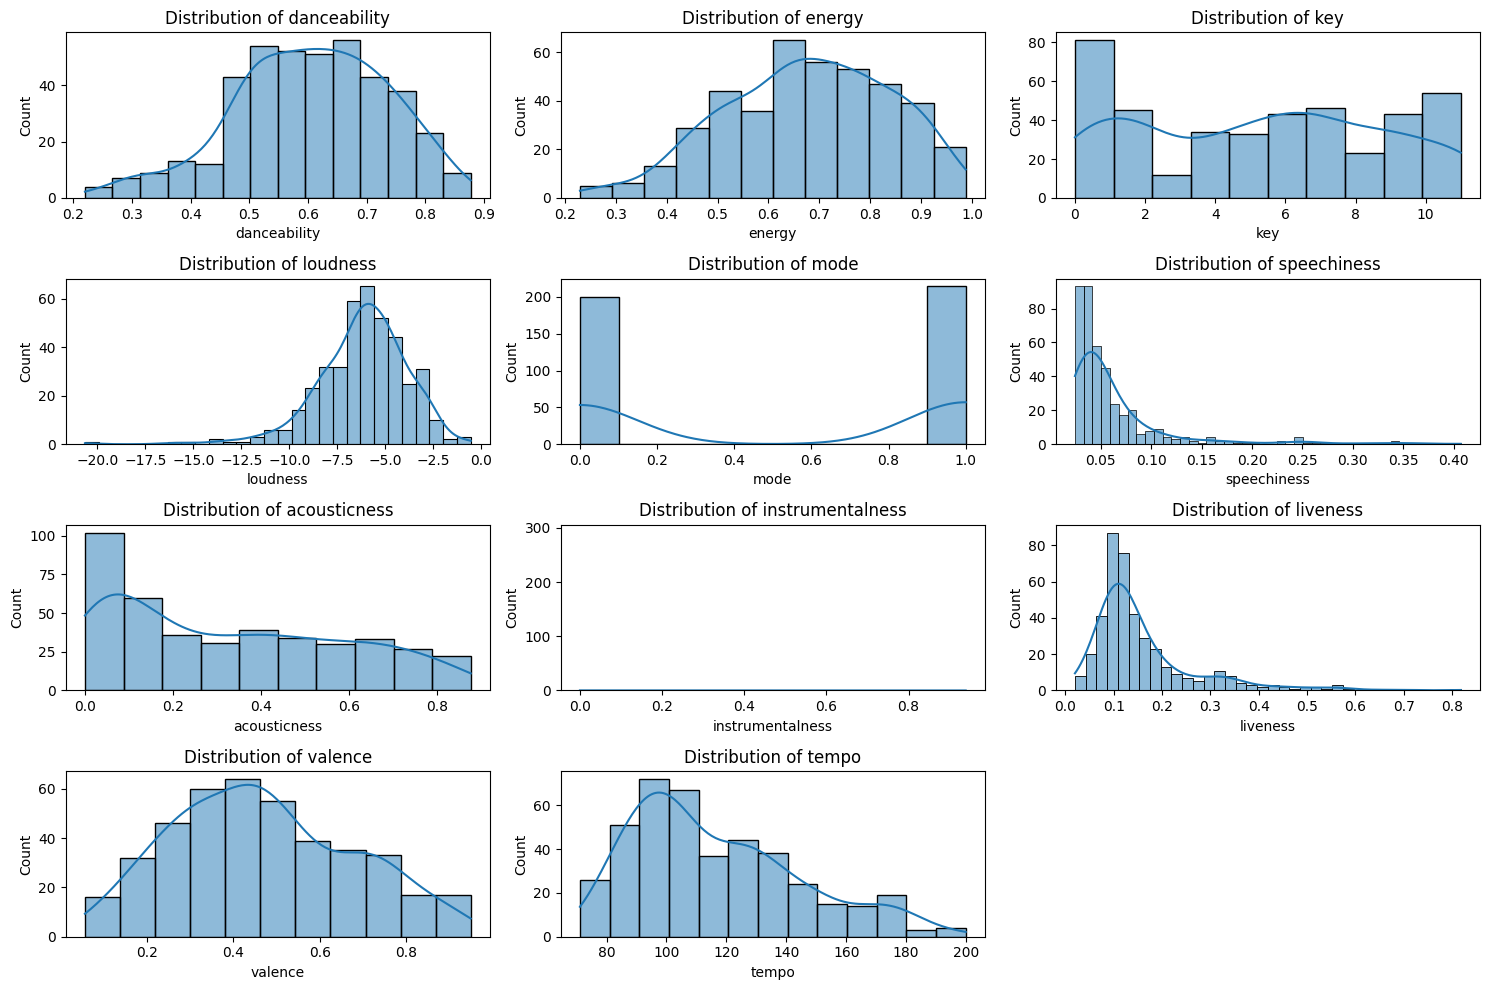

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df_playlist_tracks = pd.read_csv('playlist_tracks.csv')
df_user_tracks = pd.read_csv('user_tracks.csv')

# Check for missing values
print(df_playlist_tracks.isnull().sum())
print(df_user_tracks.isnull().sum())

# Fill or drop missing values if necessary
df_playlist_tracks.fillna(0, inplace=True)
df_user_tracks.fillna(0, inplace=True)

# Plot feature distributions for playlist tracks
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(4, 3, i+1)
    sns.histplot(df_playlist_tracks[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Normalize features if necessary
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_playlist_tracks[features] = scaler.fit_transform(df_playlist_tracks[features])
df_user_tracks[features] = scaler.transform(df_user_tracks[features])


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors

# Prepare data for training
X_playlist = df_playlist_tracks[features]
X_user = df_user_tracks[features]

# Split the data for evaluation
X_train, X_test = train_test_split(X_playlist, test_size=0.2, random_state=42)

# Train a k-NN model
knn = NearestNeighbors(n_neighbors=10, algorithm='auto')
knn.fit(X_train)

# Find nearest neighbors for user's tracks
distances, indices = knn.kneighbors(X_user)
print("Distances:", distances)
print("Indices:", indices)


Distances: [[0.00000000e+00 1.99380834e+00 2.03940336e+00 ... 2.57479100e+00
  2.57519967e+00 2.63030808e+00]
 [0.00000000e+00 1.83455263e+00 1.93953188e+00 ... 2.63340904e+00
  2.63919590e+00 2.71156149e+00]
 [0.00000000e+00 1.71556768e+00 2.09010208e+00 ... 2.38748775e+00
  2.63909102e+00 2.79058206e+00]
 ...
 [1.77968008e-03 1.04742686e+00 1.81726952e+00 ... 2.24269780e+00
  2.31052710e+00 2.36867800e+00]
 [0.00000000e+00 1.85017858e+00 2.09126289e+00 ... 2.65432336e+00
  2.68565602e+00 2.69344136e+00]
 [0.00000000e+00 1.22852386e+00 1.45355550e+00 ... 1.66565912e+00
  1.71465154e+00 1.77094880e+00]]
Indices: [[ 81  75  98 ... 222 280 256]
 [ 19 148 166 ... 122 307 310]
 [313  22 207 ... 128 246  24]
 ...
 [181 232 303 ... 182  17 161]
 [196 202  13 ... 140 310 280]
 [326 220 118 ... 165 182 146]]


In [8]:
# Get recommended track IDs
recommended_track_ids = X_train.iloc[indices.flatten()].index

# Fetch recommended track details from the playlist data
recommended_tracks = df_playlist_tracks.loc[recommended_track_ids]

# Display recommended tracks
print("Recommended Tracks:")
print(recommended_tracks[['id', 'uri', 'track_href', 'analysis_url', 'duration_ms']])


Recommended Tracks:
                         id                                   uri  \
158  3ayMReTwLoo6jAg7adDqyz  spotify:track:3ayMReTwLoo6jAg7adDqyz   
111  0mvcsYusnTYlAkOZ077lDb  spotify:track:0mvcsYusnTYlAkOZ077lDb   
147  3PX0O6fj3NyepT8dYcsw2m  spotify:track:3PX0O6fj3NyepT8dYcsw2m   
2    500mvzh7TRZ0YdnVeHhj8b  spotify:track:500mvzh7TRZ0YdnVeHhj8b   
27   1Lim1Py7xBgbAkAys3AGAG  spotify:track:1Lim1Py7xBgbAkAys3AGAG   
..                      ...                                   ...   
45   4hQ6UGyWQIGJmHSo0J88JW  spotify:track:4hQ6UGyWQIGJmHSo0J88JW   
234  0zHZSO80CTxNtvtRhveHRJ  spotify:track:0zHZSO80CTxNtvtRhveHRJ   
204  0KZQko7rcau4ube5CfND9T  spotify:track:0KZQko7rcau4ube5CfND9T   
380  3ns8G8B4x2uthgcG7u15tp  spotify:track:3ns8G8B4x2uthgcG7u15tp   
366  6nY1ltTC3zjULeJgUYjywE  spotify:track:6nY1ltTC3zjULeJgUYjywE   

                                            track_href  \
158  https://api.spotify.com/v1/tracks/3ayMReTwLoo6...   
111  https://api.spotify.com/v1/tra

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors

# Function to get audio features from Spotify track IDs (remains unchanged)
def get_audio_features(track_ids):
  sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=CLIENT_ID,
                                                               client_secret=CLIENT_SECRET))
  features = []
  for i in range(0, len(track_ids), 50):  # API allows max 50 track IDs per request
    audio_features = sp.audio_features(track_ids[i:i+50])
    features.extend(audio_features)
  return features

# Load playlist tracks data (assuming 'playlist_tracks.csv' has your data)
playlist_tracks = pd.read_csv('playlist_tracks.csv')

# Function to recommend songs based on user-selected mood
def recommend_by_mood(mood, user_tracks, playlist_tracks):
  # User-selected mood

  user_features = user_tracks[['danceability', 'energy', 'valence']].values.reshape(1, -1)
  playlist_features = playlist_tracks[['danceability', 'energy', 'valence']].values

  # Option 1: Simple Distance-based Recommendation
  knn = NearestNeighbors(n_neighbors=10, algorithm='auto')
  knn.fit(playlist_features)
  distances, indices = knn.kneighbors(user_features)
  recommended_track_ids = playlist_tracks.iloc[indices.flatten()].index

  # Return recommended tracks
  return playlist_tracks[recommended_track_ids]

# Example usage (replace with actual user and playlist data)
user_tracks = pd.DataFrame({'danceability': [0.5], 'energy': [0.8], 'valence': [0.7]})  # Example user tracks

# Get user's selected mood
user_mood = input("Enter your mood (e.g., happy, energetic, relaxed): ")

# Recommend songs based on mood
recommended_tracks = recommend_by_mood(user_mood, user_tracks, playlist_tracks)

# Display recommended tracks (modify as needed)
print("Recommended songs for", user_mood, ":")
print(recommended_tracks[['id', 'name', 'artists']].head())  # Assuming relevant columns in playlist_tracks


NameError: name 'pd' is not defined